# Finite state and pushdown automata

The module my_fsa implements finite state automata. The module my_pda implements pushdown automata and imports my_fsa, since PDA are an extension of the Fda class.

In [1]:
import my_fsa as fsa
import my_pda as pda

## 1. FSA
### Light switch FSA
Simple FSA with start and end state at Off. We can give the automaton a name. The function returns 0 if the string is accepted, -1 otherwise (not accepted or an error occurred).

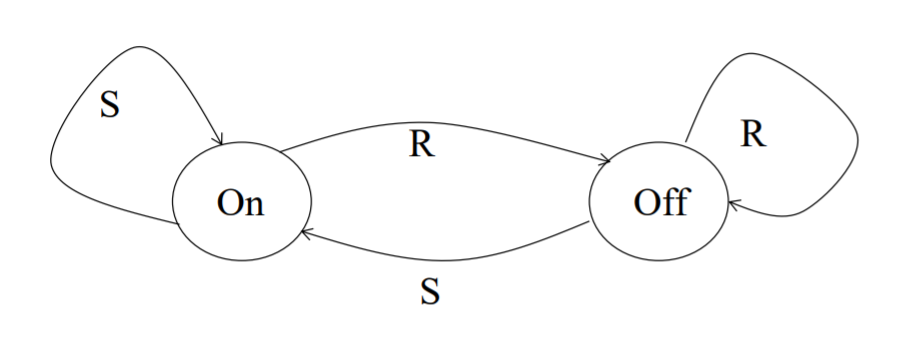

In [2]:
x = fsa.Fsa("light switch")
states = ["on","off"]
x.add_states(states)
x.define_start("off")
x.define_end(["off"])
x.add_transition("on", "S", "on", "")
x.add_transition("on", "R", "off", "")
x.add_transition("off", "S", "on", "")
x.add_transition("off", "R", "off", "")

In [3]:
a=x.run_fsa("SSR")
print(a,"\n")
a=x.run_fsa("SSS")
print(a,"\n")
a=x.run_fsa("RSSRSRSR")
print(a,"\n")

Running automaton light switch on input:  SSR
the final state is:  off
output:  
The automaton accepts this string
0 

Running automaton light switch on input:  SSS
the final state is:  on
output:  
The automaton does not accept this string
-1 

Running automaton light switch on input:  RSSRSRSR
the final state is:  off
output:  
The automaton accepts this string
0 



### Finite state transducer
This automaton accepts binary strings with an even number of 0's and any number of 1's and translates it by duplicating the 1's and halving the 0's.

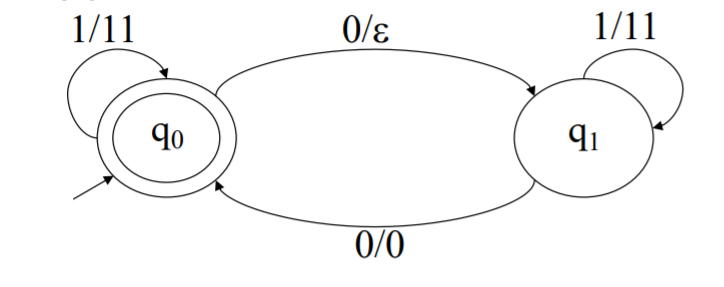

In [4]:
y = fsa.Fsa("binary transducer")
states = ["q1", "q0"]
y.add_states(states)
y.define_start("q0")
y.define_end(["q0"])
y.add_transition("q0", "1", "q0", "11")
y.add_transition("q0", "0", "q1", "")
y.add_transition("q1", "1", "q1", "11")
y.add_transition("q1", "0", "q0", "0")

In [5]:
a=y.run_fsa("0011001")
print()
a=y.run_fsa("011001")
print()
a=y.run_fsa("011000")

Running automaton binary transducer on input:  0011001
the final state is:  q0
output:  01111011
The automaton accepts this string

Running automaton binary transducer on input:  011001
the final state is:  q1
output:  1111011
The automaton does not accept this string

Running automaton binary transducer on input:  011000
the final state is:  q0
output:  111100
The automaton accepts this string


## 2. PDA
### Strings of the type a<sup>n</sup>b<sup>n</sup>
This automaton can read strings composed of a certain number of a's followed by the same number of b's by using the pile to count them and employing $\varepsilon$-moves. A FSA cannot recognize a language of this kind because of the pumping lemma. To avoid crowding the code I wrote the function `pda_from_txt` that reads a configuration file to set up the automaton. *Remember: to accept the string the automaton must be finshed reading the input and be in a final state.*
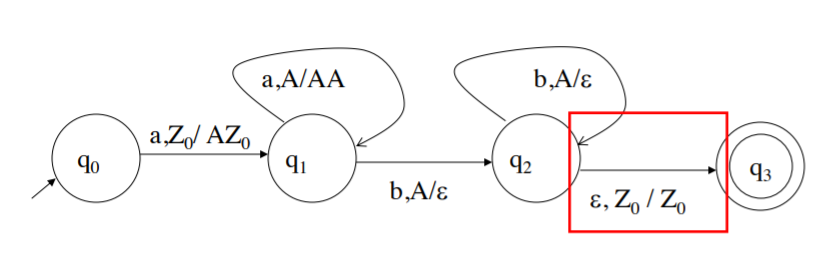

In [8]:
z = pda.pda_from_txt("data/anbn_v2.txt")
a=z.run_pda("aaabbb")

Running automaton  on input:  aaabbb
the final state is:  q3
output:  
The automaton accepts this string


This string is fine. The last $\varepsilon$ with an empty pile brought the automaton in a final state.

In [9]:
z.pile

['Z0']

In [10]:
a=z.run_pda("aabbb")

Running automaton  on input:  aabbb
the final state is:  q3
output:  
The automaton does not accept this string


This strings leads the automaton in a final state from which there is no exit, but the string is not finished, so the word is not accepted.

In [11]:
a=z.run_pda("aaabb")

Running automaton  on input:  aaabb
the final state is:  q2
output:  
The automaton does not accept this string


This string leads the automaton in a non-final state. We can see its pile

In [12]:
z.pile

['Z0', 'A']

There is still A after Z<sub>0</sub> because there are less b's than a's.

### Good parentheses
Recognize sintactically correct parentheses.
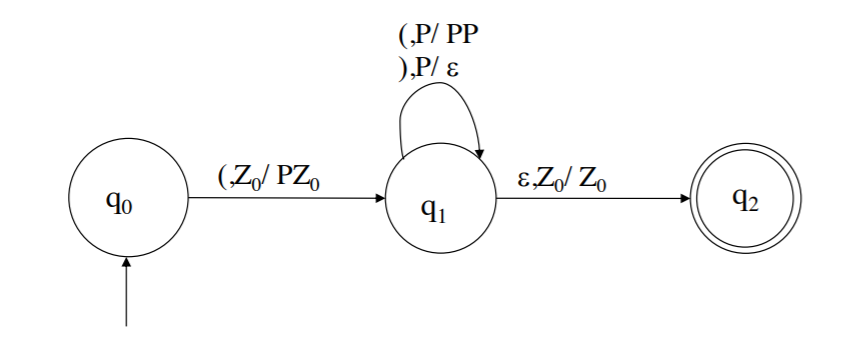

In [13]:
q = pda.pda_from_txt("data/parentheses.txt")
a = q.run_pda("(()())")

Running automaton  on input:  (()())
the final state is:  q2
output:  
The automaton accepts this string


In [14]:
a=q.run_pda("((()")

Running automaton  on input:  ((()
the final state is:  q1
output:  
The automaton does not accept this string


In [15]:
a = q.run_pda("))")

Running automaton  on input:  ))
the final state is:  q0
output:  
The automaton does not accept this string


### Complement
Automaton to recognize sintactically wrong parentheses (I made it myself so it's probably not very good)
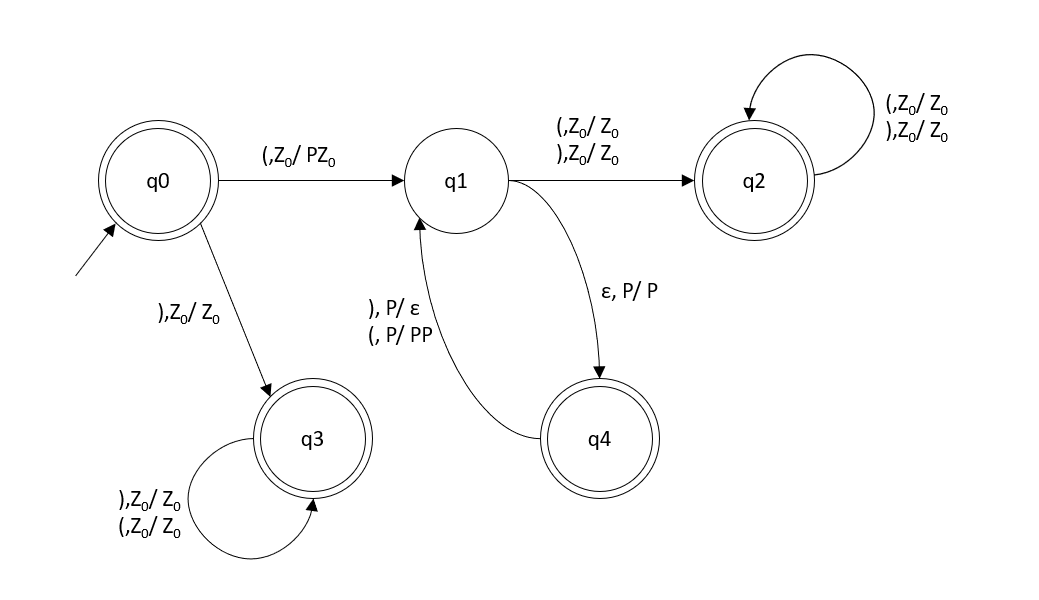

In [16]:
r = pda.pda_from_txt("data/parentheses_compl.txt")
a = r.run_pda("((()))")

Running automaton  on input:  ((()))
the final state is:  q1
output:  
The automaton does not accept this string


In [17]:
a = r.run_pda(")))")

Running automaton  on input:  )))
the final state is:  q3
output:  
The automaton accepts this string


In [18]:
a = r.run_pda("((()")

Running automaton  on input:  ((()
the final state is:  q4
output:  
The automaton accepts this string
